<a href="https://colab.research.google.com/github/RebeccaKessler/Otter_Group_Project/blob/main/AnalysisTemperature_cleaned.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing libaries

import numpy as np
import pandas as pd
import os
import re
import plotly.express as px
import csv
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

# Overview of dataframe

In [ ]:
#importing dataset on temperature
df_temp = pd.read_csv('Raw_Temp_Dec.csv')
df_temp.head(10)

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Months Code,Months,Year Code,Year,Unit,Value,Flag,Flag Description
0,ET,Temperature change on land,4,Afghanistan,7271,Temperature change,7012,December,1961,1961,°c,0.557,E,Estimated value
1,ET,Temperature change on land,4,Afghanistan,7271,Temperature change,7012,December,1962,1962,°c,-0.754,E,Estimated value
2,ET,Temperature change on land,4,Afghanistan,7271,Temperature change,7012,December,1963,1963,°c,-0.646,E,Estimated value
3,ET,Temperature change on land,4,Afghanistan,7271,Temperature change,7012,December,1964,1964,°c,-3.688,E,Estimated value
4,ET,Temperature change on land,4,Afghanistan,7271,Temperature change,7012,December,1965,1965,°c,-0.902,E,Estimated value
5,ET,Temperature change on land,4,Afghanistan,7271,Temperature change,7012,December,1966,1966,°c,-0.324,E,Estimated value
6,ET,Temperature change on land,4,Afghanistan,7271,Temperature change,7012,December,1967,1967,°c,-0.405,E,Estimated value
7,ET,Temperature change on land,4,Afghanistan,7271,Temperature change,7012,December,1968,1968,°c,-0.004,E,Estimated value
8,ET,Temperature change on land,4,Afghanistan,7271,Temperature change,7012,December,1969,1969,°c,1.931,E,Estimated value
9,ET,Temperature change on land,4,Afghanistan,7271,Temperature change,7012,December,1970,1970,°c,-0.233,E,Estimated value


In [ ]:
#displaying the types of the variables in the dataframe
df_temp.dtypes

Domain Code          object
Domain               object
Area Code (M49)       int64
Area                 object
Element Code          int64
Element              object
Months Code           int64
Months               object
Year Code             int64
Year                  int64
Unit                 object
Value               float64
Flag                 object
Flag Description     object
dtype: object

In [ ]:
#displaying all countries
df_temp["Area"].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Anguilla', 'Antarctica', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria',
       'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belgium-Luxembourg', 'Belize', 'Benin',
       'Bhutan', 'Bolivia (Plurinational State of)',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Cayman Islands', 'Central African Republic', 'Chad',
       'Channel Islands', 'Chile', 'China', 'China, Hong Kong SAR',
       'China, Macao SAR', 'China, mainland', 'China, Taiwan Province of',
       'Christmas Island', 'Cocos (Keeling) Islands', 'Colombia',
       'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', "Côte d'Ivoire",
       'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Czechoslov

In [ ]:
#identifying the number of unique countries we have data for
len(list(df_temp["Area"].unique()))

247

In [ ]:
#creating a new dataframe with only the variables of interest
df_temp_subset = df_temp.loc[:,['Area','Value','Year']]
df_temp_subset.head(10)

,Area,Value,Year
0,Afghanistan,0.557,1961
1,Afghanistan,-0.754,1962
2,Afghanistan,-0.646,1963
3,Afghanistan,-3.688,1964
4,Afghanistan,-0.902,1965
5,Afghanistan,-0.324,1966
6,Afghanistan,-0.405,1967
7,Afghanistan,-0.004,1968
8,Afghanistan,1.931,1969
9,Afghanistan,-0.233,1970


# Dealing with missing values

In [ ]:
#dealing with missing values
df_temp_subset.isna().sum()

Area       0
Value    463
Year       0
dtype: int64

In [ ]:
#creat subset for missing values in Value
df_missing_value = df_temp_subset[(df_temp_subset['Value'].isna())]
#sort subset dataframe by year and country
df_missing_value = df_missing_value.sort_values(by = ['Area', 'Year'])
print(df_missing_value.to_string())

                                               Area  Value  Year
222                                  American Samoa    NaN  1997
234                                  American Samoa    NaN  2009
536                             Antigua and Barbuda    NaN  2001
668                                           Aruba    NaN  1978
682                                           Aruba    NaN  1992
686                                           Aruba    NaN  1996
687                                           Aruba    NaN  1997
688                                           Aruba    NaN  1998
689                                           Aruba    NaN  1999
690                                           Aruba    NaN  2000
691                                           Aruba    NaN  2001
698                                           Aruba    NaN  2008
699                                           Aruba    NaN  2009
706                                           Aruba    NaN  2016
709                      

In [ ]:
#display unique countries with missing values
df_missing_value_unique = df_missing_value.Area.unique()
print(df_missing_value_unique)
# -> none of them are of relevance in regards to potato yiels, we can thus delete them from our sample

['American Samoa' 'Antigua and Barbuda' 'Aruba' 'Barbados' 'Burundi'
 'Cabo Verde' 'Cayman Islands' 'Christmas Island' 'Costa Rica' 'Djibouti'
 'Equatorial Guinea' 'Eritrea' 'Ethiopia PDR'
 'Falkland Islands (Malvinas)' 'French Southern Territories' 'Jamaica'
 'Kiribati' 'Liberia' 'Madagascar' 'Malawi' 'Maldives' 'Midway Island'
 'Montserrat' 'Nauru' 'Niue' 'Norfolk Island'
 'Pacific Islands Trust Territory' 'Palau' 'Panama' 'Pitcairn' 'Rwanda'
 'Réunion' 'Saint Kitts and Nevis' 'Samoa' 'Sao Tome and Principe'
 'Singapore' 'Solomon Islands'
 'South Georgia and the South Sandwich Islands' 'Sudan (former)'
 'Timor-Leste' 'Tokelau' 'Turks and Caicos Islands' 'Tuvalu' 'Vanuatu'
 'Wake Island' 'Yemen']


In [ ]:
#delete countries with missing temp values from dataframe
df_temp_subset = df_temp_subset[~df_temp_subset['Area'].isin(df_missing_value_unique)]
df_temp_subset.head(10)

,Area,Value,Year
0,Afghanistan,0.557,1961
1,Afghanistan,-0.754,1962
2,Afghanistan,-0.646,1963
3,Afghanistan,-3.688,1964
4,Afghanistan,-0.902,1965
5,Afghanistan,-0.324,1966
6,Afghanistan,-0.405,1967
7,Afghanistan,-0.004,1968
8,Afghanistan,1.931,1969
9,Afghanistan,-0.233,1970


In [ ]:
#checking that there are no more missing values
df_temp_subset.isna().sum()

Area     0
Value    0
Year     0
dtype: int64

In [ ]:
#eliminatnig 2022 since it is missing in the potato dataset
df_temp_subset = df_temp_subset[df_temp_subset['Year'] < 2022]

In [ ]:
#new number of countries in our sample
len(list(df_temp_subset["Area"].unique()))

201

# Regrouping Countries

In [ ]:
#check until which year we have data on the USSR
df_temp_ussr = df_temp_subset.loc[df_temp["Area"] == 'USSR']
df_temp_ussr

,Area,Value,Year
13352,USSR,0.532,1961
13353,USSR,-0.561,1962
13354,USSR,-1.472,1963
13355,USSR,-0.359,1964
13356,USSR,1.328,1965
13357,USSR,-0.359,1966
13358,USSR,-0.070,1967
13359,USSR,-0.956,1968
13360,USSR,0.047,1969
13361,USSR,-0.716,1970


In [ ]:
# check from which year we have individual values for the 'former' USSR
df_temp.loc[df_temp["Area"] == 'Russian Federation']

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Months Code,Months,Year Code,Year,Unit,Value,Flag,Flag Description
10457,ET,Temperature change on land,643,Russian Federation,7271,Temperature change,7012,December,1992,1992,°c,1.634,E,Estimated value
10458,ET,Temperature change on land,643,Russian Federation,7271,Temperature change,7012,December,1993,1993,°c,-0.562,E,Estimated value
10459,ET,Temperature change on land,643,Russian Federation,7271,Temperature change,7012,December,1994,1994,°c,-0.846,E,Estimated value
10460,ET,Temperature change on land,643,Russian Federation,7271,Temperature change,7012,December,1995,1995,°c,1.355,E,Estimated value
10461,ET,Temperature change on land,643,Russian Federation,7271,Temperature change,7012,December,1996,1996,°c,0.009,E,Estimated value
10462,ET,Temperature change on land,643,Russian Federation,7271,Temperature change,7012,December,1997,1997,°c,-1.706,E,Estimated value
10463,ET,Temperature change on land,643,Russian Federation,7271,Temperature change,7012,December,1998,1998,°c,0.788,E,Estimated value
10464,ET,Temperature change on land,643,Russian Federation,7271,Temperature change,7012,December,1999,1999,°c,3.005,E,Estimated value
10465,ET,Temperature change on land,643,Russian Federation,7271,Temperature change,7012,December,2000,2000,°c,-1.561,E,Estimated value
10466,ET,Temperature change on land,643,Russian Federation,7271,Temperature change,7012,December,2001,2001,°c,-0.069,E,Estimated value


In [ ]:
#creating subset for 'former' USSR
df_temp_formerussr = df_temp_subset.loc[df_temp_subset['Area'].isin(['Republic of Moldova', 'Belarus','Estonia', 'Latvia', 'Lithuania', 'Kazakhstan', 'Kyrgyzstan', 'Tajikistan', 'Turkmenistan', 'Uzbekistan', 'Russian Federation', 'Armenia', 'Azerbaijan', 'Georgia', 'Ukraine'])]
df_temp_formerussr

,Area,Value,Year
620,Armenia,-1.158,1992
621,Armenia,-0.375,1993
622,Armenia,-3.409,1994
623,Armenia,-0.348,1995
624,Armenia,4.437,1996
...,...,...,...
13408,Uzbekistan,-0.719,2017
13409,Uzbekistan,0.941,2018
13410,Uzbekistan,3.033,2019
13411,Uzbekistan,-3.938,2020


In [ ]:
#getting the unique countries
df_temp_formerussr_unique = df_temp_formerussr.Area.unique()
print(df_temp_formerussr_unique)

['Armenia' 'Azerbaijan' 'Belarus' 'Estonia' 'Georgia' 'Kazakhstan'
 'Kyrgyzstan' 'Latvia' 'Lithuania' 'Republic of Moldova'
 'Russian Federation' 'Tajikistan' 'Turkmenistan' 'Ukraine' 'Uzbekistan']


In [ ]:
#getting the years of 'former' russia
formerussr_years = df_temp_formerussr.loc[:,['Year']].Year.unique()
formerussr_years

array([1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
       2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021])

In [ ]:
#creating a dictionary with the values of the 'former' ussr for each year
formerussr_yearly_values = {}

for year in formerussr_years:
  values_for_year = df_temp_formerussr[df_temp_formerussr['Year'] == year]['Value'].tolist()
  formerussr_yearly_values[year] = values_for_year

for year, values in formerussr_yearly_values.items():
    print(f'Year {year}: {values}')

Year 1992: [-1.158, -1.083, 1.067, 3.37, -2.137, 1.562, 2.129, 2.507, 2.018, -1.787, 1.634, 1.92, 2.0, -1.577, 2.477]
Year 1993: [-0.375, -1.0, 2.855, 1.161, -0.155, -2.293, -0.291, 1.777, 2.28, 2.112, -0.562, 0.495, -0.791, 1.8, -2.172]
Year 1994: [-3.409, -2.669, -0.187, 2.125, -3.558, 0.326, -0.041, 1.378, 1.193, -0.401, -0.846, -0.223, -0.378, -1.453, -0.231]
Year 1995: [-0.348, -0.859, -3.944, -3.074, -1.262, -0.643, -0.662, -3.568, -3.996, -3.262, 1.355, -1.289, -0.281, -3.018, -0.987]
Year 1996: [4.437, 3.162, -3.097, -1.49, 3.166, 1.903, 1.692, -2.62, -3.612, -1.505, 0.009, 1.582, 2.81, -1.793, 2.68]
Year 1997: [0.708, 0.07, -1.533, -0.287, 0.445, -1.753, 0.3, -0.695, -0.671, -0.553, -1.706, 0.765, 0.569, -0.969, -0.488]
Year 1998: [3.041, 2.13, -1.654, 0.498, 1.85, 2.225, 2.936, -0.304, -0.853, -4.35, 0.788, 3.455, 2.626, -2.868, 2.245]
Year 1999: [2.512, 2.474, 2.54, 2.086, 2.934, 3.955, 2.052, 2.164, 2.101, 1.797, 3.005, 1.218, 2.448, 2.298, 2.583]
Year 2000: [1.463, 1.169, 

In [ ]:
#define function to calculate 'former' USSR
def weighted_sum(values, weights):
    """
    Compute the weighted sum of values.

    :param values: A list of values to be weighted.
    :param weights: A list of weights corresponding to the values.
    :return: The weighted sum.
    """
    if len(values) != len(weights):
        raise ValueError("Number of values and weights must be the same.")

    # Use a list comprehension to compute the weighted products and sum them up
    weighted_products = [value * weight for value, weight in zip(values, weights)]
    total_weighted_sum = sum(weighted_products)

    return total_weighted_sum

In [ ]:
#exectue function for 'former' ussr
weights = [0.0013,0.0039, 0.0093, 0.0020, 0.0031, 0.1224, 0.0089, 0.0029, 0.0029, 0.0015, 0.7662, 0.0064, 0.0219, 0.0271, 0.0201]
# source wikipedia

weigthed_sum_formerussr = {}
for year in formerussr_yearly_values:
    values = formerussr_yearly_values[year]
    result = weighted_sum(values, weights)
    result = "{:.3f}".format(result)
    result = float(result)
    result_dict = {'Area':'USSR', 'Value': result, 'Year':year}
    weigthed_sum_formerussr[year] = result_dict

weigthed_sum_formerussr

{1992: {'Area': 'USSR', 'Value': 1.54, 'Year': 1992},
 1993: {'Area': 'USSR', 'Value': -0.684, 'Year': 1993},
 1994: {'Area': 'USSR', 'Value': -0.679, 'Year': 1994},
 1995: {'Area': 'USSR', 'Value': 0.76, 'Year': 1995},
 1996: {'Area': 'USSR', 'Value': 0.308, 'Year': 1996},
 1997: {'Area': 'USSR', 'Value': -1.555, 'Year': 1997},
 1998: {'Area': 'USSR', 'Value': 0.943, 'Year': 1998},
 1999: {'Area': 'USSR', 'Value': 3.045, 'Year': 1999},
 2000: {'Area': 'USSR', 'Value': -0.6, 'Year': 2000},
 2001: {'Area': 'USSR', 'Value': -0.289, 'Year': 2001},
 2002: {'Area': 'USSR', 'Value': -3.731, 'Year': 2002},
 2003: {'Area': 'USSR', 'Value': 3.347, 'Year': 2003},
 2004: {'Area': 'USSR', 'Value': -0.54, 'Year': 2004},
 2005: {'Area': 'USSR', 'Value': 1.527, 'Year': 2005},
 2006: {'Area': 'USSR', 'Value': 3.221, 'Year': 2006},
 2007: {'Area': 'USSR', 'Value': 2.43, 'Year': 2007},
 2008: {'Area': 'USSR', 'Value': 1.974, 'Year': 2008},
 2009: {'Area': 'USSR', 'Value': -1.199, 'Year': 2009},
 2010: {

In [ ]:
#convert dictionary to dataframe
df_temp_formerussr= pd.DataFrame.from_dict(weigthed_sum_formerussr,
                                         orient = 'index',
                                         columns = ['Area', 'Value', 'Year'])
df_temp_formerussr.reset_index(drop=True)

,Area,Value,Year
0,USSR,1.540,1992
1,USSR,-0.684,1993
2,USSR,-0.679,1994
3,USSR,0.760,1995
4,USSR,0.308,1996
5,USSR,-1.555,1997
6,USSR,0.943,1998
7,USSR,3.045,1999
8,USSR,-0.600,2000
9,USSR,-0.289,2001


In [ ]:
#add dataframe to original dataframe
df_temp_subset2 = pd.concat([df_temp_subset, df_temp_formerussr])
df_temp_subset2 = df_temp_subset2.reset_index(drop=True)
df_temp_subset2 = df_temp_subset2.sort_values(['Area', 'Year'])
df_temp_subset2

,Area,Value,Year
0,Afghanistan,0.557,1961
1,Afghanistan,-0.754,1962
2,Afghanistan,-0.646,1963
3,Afghanistan,-3.688,1964
4,Afghanistan,-0.902,1965
...,...,...,...
11085,Zimbabwe,0.380,2017
11086,Zimbabwe,1.136,2018
11087,Zimbabwe,1.866,2019
11088,Zimbabwe,-0.539,2020


In [ ]:
#removing the individual countries of former USSR from the datatset
df_temp_subset2 = df_temp_subset2.loc[~df_temp_subset2['Area'].isin(['Republic of Moldova', 'Belarus','Estonia', 'Latvia', 'Lithuania', 'Kazakhstan', 'Kyrgyzstan', 'Tajikistan', 'Turkmenistan', 'Uzbekistan', 'Russian Federation', 'Armenia', 'Azerbaijan', 'Georgia', 'Ukraine'])]
df_temp_subset2

,Area,Value,Year
0,Afghanistan,0.557,1961
1,Afghanistan,-0.754,1962
2,Afghanistan,-0.646,1963
3,Afghanistan,-3.688,1964
4,Afghanistan,-0.902,1965
...,...,...,...
11085,Zimbabwe,0.380,2017
11086,Zimbabwe,1.136,2018
11087,Zimbabwe,1.866,2019
11088,Zimbabwe,-0.539,2020


In [ ]:
#check until which year we have data on Yugoslavia
df_temp_yguo = df_temp_subset2.loc[df_temp_subset2["Area"] == 'Yugoslav SFR']
df_temp_yguo

,Area,Value,Year
10937,Yugoslav SFR,-0.941,1961
10938,Yugoslav SFR,-3.426,1962
10939,Yugoslav SFR,-1.893,1963
10940,Yugoslav SFR,0.382,1964
10941,Yugoslav SFR,1.441,1965
10942,Yugoslav SFR,-0.114,1966
10943,Yugoslav SFR,-1.333,1967
10944,Yugoslav SFR,-1.845,1968
10945,Yugoslav SFR,-2.672,1969
10946,Yugoslav SFR,-0.099,1970


In [ ]:
# check from which year we have individual values for the 'former' Yugoslavia
df_temp_subset2.loc[df_temp_subset2["Area"] == 'Croatia']

,Area,Value,Year
2682,Croatia,-0.255,1992
2683,Croatia,1.479,1993
2684,Croatia,0.955,1994
2685,Croatia,0.558,1995
2686,Croatia,-1.021,1996
2687,Croatia,1.305,1997
2688,Croatia,-2.737,1998
2689,Croatia,0.153,1999
2690,Croatia,2.649,2000
2691,Croatia,-3.444,2001


In [ ]:
#creating a subset of 'former' yugoslavia countries
df_temp_formeryugo = df_temp_subset2.loc[df_temp_subset2['Area'].isin(['Bosnia and Herzegovina','Croatia','North Macedonia','Serbia and Montenegro','Serbia', 'Montenegro','Kosovo','Slovenia'])]
df_temp_formeryugo

,Area,Value,Year
1188,Bosnia and Herzegovina,-0.587,1992
1189,Bosnia and Herzegovina,1.722,1993
1190,Bosnia and Herzegovina,0.696,1994
1191,Bosnia and Herzegovina,0.910,1995
1192,Bosnia and Herzegovina,-0.876,1996
...,...,...,...
9173,Slovenia,1.338,2017
9174,Slovenia,1.394,2018
9175,Slovenia,3.171,2019
9176,Slovenia,2.196,2020


In [ ]:
#getting the unique countries
df_temp_formeryugo_unique = df_temp_formeryugo.Area.unique()
print(df_temp_formeryugo_unique)

['Bosnia and Herzegovina' 'Croatia' 'Montenegro' 'North Macedonia'
 'Serbia' 'Serbia and Montenegro' 'Slovenia']


In [ ]:
#subset with montenegro and serbia
df_temp_ms = df_temp_formeryugo.loc[df_temp_formeryugo['Area'].isin(['Serbia', 'Montenegro'])]
df_temp_ms

,Area,Value,Year
6848,Montenegro,0.964,2006
6849,Montenegro,-1.418,2007
6850,Montenegro,1.493,2008
6851,Montenegro,1.868,2009
6852,Montenegro,0.457,2010
6853,Montenegro,1.386,2011
6854,Montenegro,-1.040,2012
6855,Montenegro,0.250,2013
6856,Montenegro,1.204,2014
6857,Montenegro,0.472,2015


In [ ]:
#getting the years of montenegro and serbia
ms_years = df_temp_ms.loc[:,['Year']].Year.unique()
ms_years

array([2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
       2017, 2018, 2019, 2020, 2021])

In [ ]:
#creating a dictionary with the values of montenegro and serbia for each year
ms_yearly_values = {}

for year in ms_years:
  values_for_year = df_temp_ms[df_temp_ms['Year'] == year]['Value'].tolist()
  ms_yearly_values[year] = values_for_year

for year, values in ms_yearly_values.items():
    print(f'Year {year}: {values}')

Year 2006: [0.964, 1.263]
Year 2007: [-1.418, -1.329]
Year 2008: [1.493, 1.839]
Year 2009: [1.868, 1.762]
Year 2010: [0.457, 0.073]
Year 2011: [1.386, 1.748]
Year 2012: [-1.04, -1.102]
Year 2013: [0.25, 0.237]
Year 2014: [1.204, 1.488]
Year 2015: [0.472, 1.684]
Year 2016: [-0.641, -1.045]
Year 2017: [0.716, 1.867]
Year 2018: [-0.17, -0.042]
Year 2019: [2.079, 2.638]
Year 2020: [2.942, 3.366]
Year 2021: [0.841, 1.443]


In [ ]:
#exectue function for montenegro and serbia
weights = [0.1352,0.8648]
# source wikipedia

weigthed_sum_ms = {}
for year in ms_yearly_values:
    values = ms_yearly_values[year]
    result = weighted_sum(values, weights)
    result = "{:.3f}".format(result)
    result = float(result)
    result_dict = {'Area':'Serbia and Montenegro', 'Value': result, 'Year':year}
    weigthed_sum_ms[year] = result_dict

weigthed_sum_ms

{2006: {'Area': 'Serbia and Montenegro', 'Value': 1.223, 'Year': 2006},
 2007: {'Area': 'Serbia and Montenegro', 'Value': -1.341, 'Year': 2007},
 2008: {'Area': 'Serbia and Montenegro', 'Value': 1.792, 'Year': 2008},
 2009: {'Area': 'Serbia and Montenegro', 'Value': 1.776, 'Year': 2009},
 2010: {'Area': 'Serbia and Montenegro', 'Value': 0.125, 'Year': 2010},
 2011: {'Area': 'Serbia and Montenegro', 'Value': 1.699, 'Year': 2011},
 2012: {'Area': 'Serbia and Montenegro', 'Value': -1.094, 'Year': 2012},
 2013: {'Area': 'Serbia and Montenegro', 'Value': 0.239, 'Year': 2013},
 2014: {'Area': 'Serbia and Montenegro', 'Value': 1.45, 'Year': 2014},
 2015: {'Area': 'Serbia and Montenegro', 'Value': 1.52, 'Year': 2015},
 2016: {'Area': 'Serbia and Montenegro', 'Value': -0.99, 'Year': 2016},
 2017: {'Area': 'Serbia and Montenegro', 'Value': 1.711, 'Year': 2017},
 2018: {'Area': 'Serbia and Montenegro', 'Value': -0.059, 'Year': 2018},
 2019: {'Area': 'Serbia and Montenegro', 'Value': 2.562, 'Year'

In [ ]:
#convert dictionary to dataframe
df_temp_ms= pd.DataFrame.from_dict(weigthed_sum_ms,
                                         orient = 'index',
                                         columns = ['Area', 'Value', 'Year'])
df_temp_ms = df_temp_ms.reset_index(drop=True)
df_temp_ms

,Area,Value,Year
0,Serbia and Montenegro,1.223,2006
1,Serbia and Montenegro,-1.341,2007
2,Serbia and Montenegro,1.792,2008
3,Serbia and Montenegro,1.776,2009
4,Serbia and Montenegro,0.125,2010
5,Serbia and Montenegro,1.699,2011
6,Serbia and Montenegro,-1.094,2012
7,Serbia and Montenegro,0.239,2013
8,Serbia and Montenegro,1.450,2014
9,Serbia and Montenegro,1.520,2015


In [ ]:
#add dataframe to original dataframe
df_temp_formeryugo = pd.concat([df_temp_ms, df_temp_formeryugo])
df_temp_formeryugo  = df_temp_formeryugo.reset_index(drop=True)
df_temp_formeryugo  = df_temp_formeryugo.sort_values(['Area', 'Year'])
df_temp_formeryugo

,Area,Value,Year
16,Bosnia and Herzegovina,-0.587,1992
17,Bosnia and Herzegovina,1.722,1993
18,Bosnia and Herzegovina,0.696,1994
19,Bosnia and Herzegovina,0.910,1995
20,Bosnia and Herzegovina,-0.876,1996
...,...,...,...
177,Slovenia,1.338,2017
178,Slovenia,1.394,2018
179,Slovenia,3.171,2019
180,Slovenia,2.196,2020


In [ ]:
#removing serbia and montenegro from the datatset
df_temp_formeryugo = df_temp_formeryugo.loc[~df_temp_formeryugo['Area'].isin(['Serbia', 'Montenegro'])]
df_temp_formeryugo

,Area,Value,Year
16,Bosnia and Herzegovina,-0.587,1992
17,Bosnia and Herzegovina,1.722,1993
18,Bosnia and Herzegovina,0.696,1994
19,Bosnia and Herzegovina,0.910,1995
20,Bosnia and Herzegovina,-0.876,1996
...,...,...,...
177,Slovenia,1.338,2017
178,Slovenia,1.394,2018
179,Slovenia,3.171,2019
180,Slovenia,2.196,2020


In [ ]:
#getting the years of 'former' yugo
formeryugo_years = df_temp_formeryugo.loc[:,['Year']].Year.unique()
formeryugo_years

array([1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
       2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021])

In [ ]:
#creating a dictionary with the values of the 'former' ussr for each year
formeryugo_yearly_values = {}

for year in formeryugo_years:
  values_for_year = df_temp_formeryugo[df_temp_formeryugo['Year'] == year]['Value'].tolist()
  formeryugo_yearly_values[year] = values_for_year


for year, values in formeryugo_yearly_values.items():
  print(f'Year {year}: {values}')

Year 1992: [-0.587, -0.255, -1.403, -1.122, 0.128]
Year 1993: [1.722, 1.479, 1.646, 1.977, 1.406]
Year 1994: [0.696, 0.955, -0.069, 0.358, 1.643]
Year 1995: [0.91, 0.558, 1.313, 0.955, -0.099]
Year 1996: [-0.876, -1.021, 0.571, -0.528, -1.653]
Year 1997: [1.194, 1.305, 0.118, 1.0, 1.769]
Year 1998: [-3.204, -2.737, -3.042, -3.857, -2.033]
Year 1999: [0.25, 0.153, 1.144, 0.49, 0.077]
Year 2000: [2.543, 2.649, 1.552, 2.26, 2.955]
Year 2001: [-3.893, -3.444, -5.545, -4.593, -2.836]
Year 2002: [0.473, 0.682, -0.076, -0.274, 0.908]
Year 2003: [0.487, 0.748, -0.231, 0.127, 1.085]
Year 2004: [1.436, 1.301, 1.315, 1.492, 0.974]
Year 2005: [-0.126, -0.414, 0.535, 0.473, -0.494]
Year 2006: [1.706, 2.13, 0.254, 1.223, 2.853]
Year 2007: [-1.183, -0.953, -1.341, -1.341, -0.395]
Year 2008: [1.462, 1.339, 1.486, 1.792, 1.392]
Year 2009: [1.407, 1.095, 2.333, 1.776, 0.881]
Year 2010: [-0.315, -0.777, 0.702, 0.125, -1.33]
Year 2011: [1.748, 1.914, 0.427, 1.699, 2.302]
Year 2012: [-0.621, -0.339, -1.035

In [ ]:
#exectue function for 'former' yugo
weights = [0.1919, 0.2121, 0.1005, 0.4237, 0.0760]
# source wikipedia

weigthed_sum_formeryugo = {}
for year in formeryugo_yearly_values:
    values = formeryugo_yearly_values[year]
    result = weighted_sum(values, weights)
    result = "{:.3f}".format(result)
    result = float(result)
    result_dict = {'Area':'Yugoslav SFR', 'Value': result, 'Year':year}
    weigthed_sum_formeryugo[year] = result_dict

weigthed_sum_formeryugo

{1992: {'Area': 'Yugoslav SFR', 'Value': -0.773, 'Year': 1992},
 1993: {'Area': 'Yugoslav SFR', 'Value': 1.754, 'Year': 1993},
 1994: {'Area': 'Yugoslav SFR', 'Value': 0.606, 'Year': 1994},
 1995: {'Area': 'Yugoslav SFR', 'Value': 0.822, 'Year': 1995},
 1996: {'Area': 'Yugoslav SFR', 'Value': -0.677, 'Year': 1996},
 1997: {'Area': 'Yugoslav SFR', 'Value': 1.076, 'Year': 1997},
 1998: {'Area': 'Yugoslav SFR', 'Value': -3.29, 'Year': 1998},
 1999: {'Area': 'Yugoslav SFR', 'Value': 0.409, 'Year': 1999},
 2000: {'Area': 'Yugoslav SFR', 'Value': 2.388, 'Year': 2000},
 2001: {'Area': 'Yugoslav SFR', 'Value': -4.196, 'Year': 2001},
 2002: {'Area': 'Yugoslav SFR', 'Value': 0.181, 'Year': 2002},
 2003: {'Area': 'Yugoslav SFR', 'Value': 0.365, 'Year': 2003},
 2004: {'Area': 'Yugoslav SFR', 'Value': 1.39, 'Year': 2004},
 2005: {'Area': 'Yugoslav SFR', 'Value': 0.105, 'Year': 2005},
 2006: {'Area': 'Yugoslav SFR', 'Value': 1.54, 'Year': 2006},
 2007: {'Area': 'Yugoslav SFR', 'Value': -1.162, 'Year

In [ ]:
#convert dictionary to dataframe
df_temp_formeryugo= pd.DataFrame.from_dict(weigthed_sum_formeryugo,
                                         orient = 'index',
                                         columns = ['Area', 'Value', 'Year'])
df_temp_formeryugo.reset_index(drop=True)

,Area,Value,Year
0,Yugoslav SFR,-0.773,1992
1,Yugoslav SFR,1.754,1993
2,Yugoslav SFR,0.606,1994
3,Yugoslav SFR,0.822,1995
4,Yugoslav SFR,-0.677,1996
5,Yugoslav SFR,1.076,1997
6,Yugoslav SFR,-3.290,1998
7,Yugoslav SFR,0.409,1999
8,Yugoslav SFR,2.388,2000
9,Yugoslav SFR,-4.196,2001


In [ ]:
#add dataframe to original dataframe
df_temp_subset3 = pd.concat([df_temp_subset2, df_temp_formeryugo])
df_temp_subset3 = df_temp_subset3.reset_index(drop=True)
df_temp_subset3 = df_temp_subset3.sort_values(['Area', 'Year'])
df_temp_subset3

,Area,Value,Year
0,Afghanistan,0.557,1961
1,Afghanistan,-0.754,1962
2,Afghanistan,-0.646,1963
3,Afghanistan,-3.688,1964
4,Afghanistan,-0.902,1965
...,...,...,...
10665,Zimbabwe,0.380,2017
10666,Zimbabwe,1.136,2018
10667,Zimbabwe,1.866,2019
10668,Zimbabwe,-0.539,2020


In [ ]:
#removing the individual countries of former yugoslavia from the datatset
df_temp_subset3 = df_temp_subset3.loc[~df_temp_subset3['Area'].isin(['Bosnia and Herzegovina', 'Croatia', 'North Macedonia','Serbia and Montenegro', 'Serbia', 'Montenegro', 'Slovenia'])]
df_temp_subset3

,Area,Value,Year
0,Afghanistan,0.557,1961
1,Afghanistan,-0.754,1962
2,Afghanistan,-0.646,1963
3,Afghanistan,-3.688,1964
4,Afghanistan,-0.902,1965
...,...,...,...
10665,Zimbabwe,0.380,2017
10666,Zimbabwe,1.136,2018
10667,Zimbabwe,1.866,2019
10668,Zimbabwe,-0.539,2020


In [ ]:
#dealing with czechosloviakia
df_temp_czechoslovakia = df_temp_subset3.loc[df_temp_subset3['Area'].isin(['Czechia','Slovakia'])]
df_temp_czechoslovakia

,Area,Value,Year
2683,Czechia,2.305,1993
2684,Czechia,2.101,1994
2685,Czechia,-1.691,1995
2686,Czechia,-3.350,1996
2687,Czechia,1.753,1997
2688,Czechia,-0.761,1998
2689,Czechia,0.854,1999
2690,Czechia,2.176,2000
2691,Czechia,-2.388,2001
2692,Czechia,-1.179,2002


In [ ]:
#getting the years for czechosloviakia
czechoslovakia_years = df_temp_czechoslovakia.loc[:,['Year']].Year.unique()
czechoslovakia_years

array([1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018, 2019, 2020, 2021])

In [ ]:
#convert to dictionary
czechoslovakia_yearly_values = {}

for year in czechoslovakia_years:
  values_for_year = df_temp_czechoslovakia[df_temp_czechoslovakia['Year'] == year]['Value'].tolist()
  czechoslovakia_yearly_values[year] = values_for_year


for year, values in czechoslovakia_yearly_values.items():
  print(f'Year {year}: {values}')

Year 1993: [2.305, 2.208]
Year 1994: [2.101, 1.12]
Year 1995: [-1.691, -1.35]
Year 1996: [-3.35, -3.081]
Year 1997: [1.753, 1.615]
Year 1998: [-0.761, -2.861]
Year 1999: [0.854, -0.01]
Year 2000: [2.176, 2.369]
Year 2001: [-2.388, -4.141]
Year 2002: [-1.179, -1.877]
Year 2003: [0.915, 0.747]
Year 2004: [0.696, 0.937]
Year 2005: [-0.194, -0.295]
Year 2006: [3.376, 2.838]
Year 2007: [0.44, -0.284]
Year 2008: [1.595, 2.163]
Year 2009: [0.045, 0.528]
Year 2010: [-3.658, -2.594]
Year 2011: [2.974, 2.208]
Year 2012: [0.03, -1.09]
Year 2013: [2.761, 2.012]
Year 2014: [2.387, 2.49]
Year 2015: [5.002, 3.524]
Year 2016: [1.013, -0.322]
Year 2017: [1.798, 1.559]
Year 2018: [2.289, 0.956]
Year 2019: [3.145, 2.829]
Year 2020: [2.71, 3.185]
Year 2021: [1.481, 0.738]


In [ ]:
#exectue function to calculate temperature change for czechoslovakia
weights = [0.7229, 0.2771]
# source wikipedia

weigthed_sum_czechoslovakia = {}
for year in czechoslovakia_yearly_values:
    values = czechoslovakia_yearly_values[year]
    result = weighted_sum(values, weights)
    result = "{:.3f}".format(result)
    result = float(result)
    result_dict = {'Area':'Czechoslovakia', 'Value': result, 'Year':year}
    weigthed_sum_czechoslovakia[year] = result_dict

weigthed_sum_czechoslovakia

{1993: {'Area': 'Czechoslovakia', 'Value': 2.278, 'Year': 1993},
 1994: {'Area': 'Czechoslovakia', 'Value': 1.829, 'Year': 1994},
 1995: {'Area': 'Czechoslovakia', 'Value': -1.597, 'Year': 1995},
 1996: {'Area': 'Czechoslovakia', 'Value': -3.275, 'Year': 1996},
 1997: {'Area': 'Czechoslovakia', 'Value': 1.715, 'Year': 1997},
 1998: {'Area': 'Czechoslovakia', 'Value': -1.343, 'Year': 1998},
 1999: {'Area': 'Czechoslovakia', 'Value': 0.615, 'Year': 1999},
 2000: {'Area': 'Czechoslovakia', 'Value': 2.229, 'Year': 2000},
 2001: {'Area': 'Czechoslovakia', 'Value': -2.874, 'Year': 2001},
 2002: {'Area': 'Czechoslovakia', 'Value': -1.372, 'Year': 2002},
 2003: {'Area': 'Czechoslovakia', 'Value': 0.868, 'Year': 2003},
 2004: {'Area': 'Czechoslovakia', 'Value': 0.763, 'Year': 2004},
 2005: {'Area': 'Czechoslovakia', 'Value': -0.222, 'Year': 2005},
 2006: {'Area': 'Czechoslovakia', 'Value': 3.227, 'Year': 2006},
 2007: {'Area': 'Czechoslovakia', 'Value': 0.239, 'Year': 2007},
 2008: {'Area': 'Cz

In [ ]:
#convert to dataframe
df_temp_czechoslovakia= pd.DataFrame.from_dict(weigthed_sum_czechoslovakia,
                                         orient = 'index',
                                         columns = ['Area', 'Value', 'Year'])
df_temp_czechoslovakia.reset_index(drop=True)

,Area,Value,Year
0,Czechoslovakia,2.278,1993
1,Czechoslovakia,1.829,1994
2,Czechoslovakia,-1.597,1995
3,Czechoslovakia,-3.275,1996
4,Czechoslovakia,1.715,1997
5,Czechoslovakia,-1.343,1998
6,Czechoslovakia,0.615,1999
7,Czechoslovakia,2.229,2000
8,Czechoslovakia,-2.874,2001
9,Czechoslovakia,-1.372,2002


In [ ]:
#adding czechosloviakia to the dataframe
df_temp_subset4 = pd.concat([df_temp_subset3, df_temp_czechoslovakia])
df_temp_subset4 = df_temp_subset4.reset_index(drop=True)
df_temp_subset4 = df_temp_subset4.sort_values(['Area', 'Year'])
df_temp_subset4

,Area,Value,Year
0,Afghanistan,0.557,1961
1,Afghanistan,-0.754,1962
2,Afghanistan,-0.646,1963
3,Afghanistan,-3.688,1964
4,Afghanistan,-0.902,1965
...,...,...,...
10529,Zimbabwe,0.380,2017
10530,Zimbabwe,1.136,2018
10531,Zimbabwe,1.866,2019
10532,Zimbabwe,-0.539,2020


In [ ]:
#removing individual countries of czechoslovakia
df_temp_subset4 = df_temp_subset4.loc[~df_temp_subset4['Area'].isin(['Czechia','Slovakia'])]
df_temp_subset4

,Area,Value,Year
0,Afghanistan,0.557,1961
1,Afghanistan,-0.754,1962
2,Afghanistan,-0.646,1963
3,Afghanistan,-3.688,1964
4,Afghanistan,-0.902,1965
...,...,...,...
10529,Zimbabwe,0.380,2017
10530,Zimbabwe,1.136,2018
10531,Zimbabwe,1.866,2019
10532,Zimbabwe,-0.539,2020


# Additional Cleaning/Renaming

In [ ]:
#merging Belgium-Luxembourg and Belgium

for y in list(range(2000,2022,1)):
  value = df_temp_subset4.loc[(df_temp_subset4.Area == "Belgium") & (df_temp_subset4.Year == y),"Value"].sum()
  new_row = {"Area": "Belgium-Luxembourg","Value": value, "Year": y}
  df_temp_subset4 = df_temp_subset4.append(new_row,ignore_index=True)
df_temp_subset4 = df_temp_subset4.sort_values(by=["Area","Year"])
df_temp_subset4 = df_temp_subset4.loc[~(df_temp_subset4.Area=="Belgium")]
df_temp_subset4 = df_temp_subset4.loc[~(df_temp_subset4.Area=="Luxembourg")]

<ipython-input-1013-9ab2f6a2e99b>:6: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-1013-9ab2f6a2e99b>:6: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-1013-9ab2f6a2e99b>:6: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-1013-9ab2f6a2e99b>:6: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-1013-9ab2f6a2e99b>:6: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-1013-9ab2f6a2e99b>:6: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future versi

In [ ]:
#merging Ethiopia PDR and Ethiopia

for y in list(range(1993,2022,1)):
  value = df_temp_subset4.loc[(df_temp_subset4.Area == "Ethiopia") & (df_temp_subset4.Year == y),"Value"].sum()
  new_row = {"Area": "Ethiopia PDR","Value": value, "Year": y}
  df_temp_subset4 = df_temp_subset4.append(new_row,ignore_index=True)
df_temp_subset4 = df_temp_subset4.sort_values(by=["Area","Year"])
df_temp_subset4 = df_temp_subset4.loc[~(df_temp_subset4.Area=="Ethiopia")]

<ipython-input-1014-5a4c9e716ac8>:6: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-1014-5a4c9e716ac8>:6: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-1014-5a4c9e716ac8>:6: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-1014-5a4c9e716ac8>:6: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-1014-5a4c9e716ac8>:6: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-1014-5a4c9e716ac8>:6: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future versi

In [ ]:
China = ["China, Taiwan Province of","China, mainland"]
df_temp_subset4 = df_temp_subset4.loc[~(df_temp_subset4.Area.isin(China))]

In [ ]:
#renaming turkey
df_temp_subset4['Area'] = df_temp_subset4['Area'].str.replace('Türkiye', 'Turkey')

In [ ]:
#cleaning for missing values in potato dataset
df_temp_final = df_temp_subset4.loc[df_temp_subset4['Area'].isin(['Afghanistan','Albania','Algeria','Angola','Argentina','Australia','Austria','Bangladesh','Belgium-Luxembourg','Bhutan','Bolivia (Plurinational State of)','Brazil','Bulgaria','Burundi','Cabo Verde','Cameroon','Canada','Central African Republic','Chad','Chile','China','China, Taiwan Province of','China, mainland','Colombia','Congo','Costa Rica','Cuba','Cyprus','Czechoslovakia',"Democratic People's Republic of Korea",'Democratic Republic of the Congo','Denmark','Dominica','Dominican Republic','Ecuador','Egypt','El Salvador','Eswatini','Ethiopia PDR','Faroe Islands','Fiji','Finland','France','French Polynesia','Germany','Greece','Guatemala','Haiti','Honduras','Hungary','Iceland','India','Indonesia','Iran (Islamic Republic of)','Iraq','Ireland','Israel','Italy','Jamaica','Japan','Jordan','Kenya',"Lao People's Democratic Republic",'Lebanon','Lesotho','Libya','Madagascar','Malawi','Malta','Mauritania','Mauritius','Mexico','Mongolia','Morocco','Mozambique','Myanmar','Nepal','Netherlands (Kingdom of the)','New Caledonia','New Zealand','Nicaragua','Nigeria','Norway','Pakistan','Panama','Papua New Guinea','Paraguay','Peru','Philippines','Poland','Portugal','Republic of Korea','Romania','Rwanda','Saint Kitts and Nevis','Saudi Arabia','Senegal','South Africa','Spain','Sri Lanka','Sweden','Switzerland','Syrian Arab Republic','Thailand','Timor-Leste','Tunisia','Turkey','USSR','Uganda','United Kingdom of Great Britain and Northern Ireland','United Republic of Tanzania','United States of America','Uruguay','Venezuela (Bolivarian Republic of)','Viet Nam','Yemen','Yugoslav SFR','Zambia','Zimbabwe'])]

In [ ]:
#export dataset
df_temp_final.to_csv('Temp_1961-2021.csv', index=False)

# Final Sample: Descriptive Statistics

In [ ]:
#sample size of final sample
len(list(df_temp_final["Area"].unique()))

106

In [ ]:
#general description of data
df_temp_final.describe()

,Value,Year
count,6434.000000,6434.000000
mean,0.421632,1991.072117
std,1.305786,17.610086
min,-8.237000,1961.000000
25%,-0.211750,1976.000000
50%,0.442500,1991.000000
75%,1.117000,2006.000000
max,6.880000,2021.000000


In [ ]:
df_temp_final.head(5)

,Area,Value,Year
0,Afghanistan,0.557,1961
1,Afghanistan,-0.754,1962
2,Afghanistan,-0.646,1963
3,Afghanistan,-3.688,1964
4,Afghanistan,-0.902,1965


In [ ]:
#variable types of final sample
df_temp_final.dtypes

Area      object
Value    float64
Year       int64
dtype: object

In [ ]:
#getting the unique countries
df_temp_final["Area"].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Australia', 'Austria', 'Bangladesh', 'Belgium-Luxembourg',
       'Bhutan', 'Bolivia (Plurinational State of)', 'Brazil', 'Bulgaria',
       'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Congo', 'Cuba', 'Cyprus', 'Czechoslovakia',
       "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Eswatini', 'Ethiopia PDR', 'Faroe Islands', 'Fiji', 'Finland',
       'France', 'French Polynesia', 'Germany', 'Greece', 'Guatemala',
       'Haiti', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia',
       'Iran (Islamic Republic of)', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Japan', 'Jordan', 'Kenya', "Lao People's Democratic Republic",
       'Lebanon', 'Lesotho', 'Libya', 'Malta', 'Mauritania', 'Mauritius',
       'Mexico', 'Mongolia', 'Mo

In [ ]:
#skewness of data
data_skewness = skew(df_temp_final['Value'])
print(f'Skewness: {data_skewness:.2f}')

Skewness: -0.34


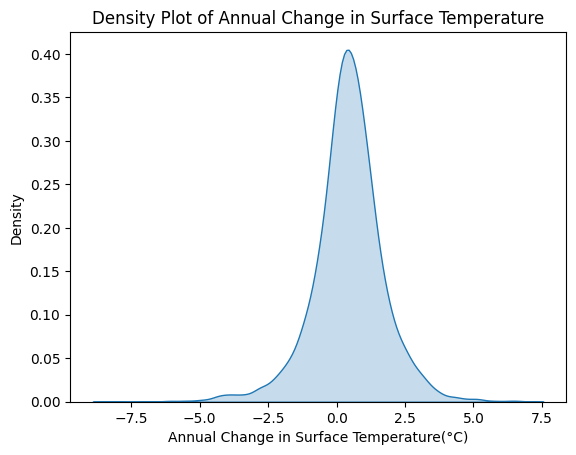

In [ ]:
#plotting the distribution of values
sns.kdeplot(df_temp_final['Value'], fill=True)

# Customize the plot (optional)
plt.title('Density Plot of Annual Change in Surface Temperature')
plt.xlabel('Annual Change in Surface Temperature(°C)')
plt.ylabel('Density')

# Display the plot
plt.show()

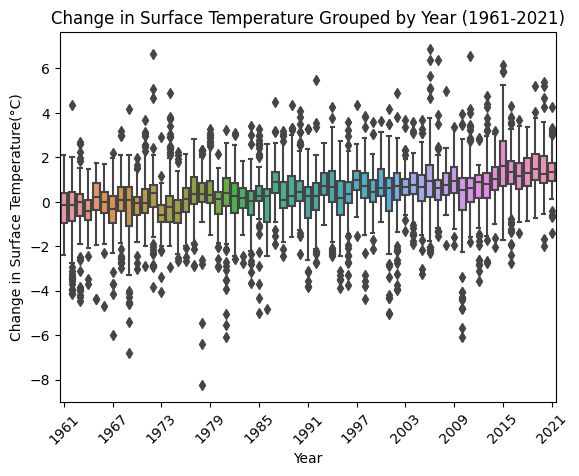

In [ ]:
#boxplot grouped by year
plot = sns.boxplot(x='Year', y='Value', data=df_temp_final)

plt.title("Change in Surface Temperature Grouped by Year (1961-2021)")
plt.xlabel('Year')
plt.ylabel('Change in Surface Temperature(°C)')

plt.gca().xaxis.set_major_locator(plt.MaxNLocator(12))
plt.xticks(rotation=45)


plt.show()

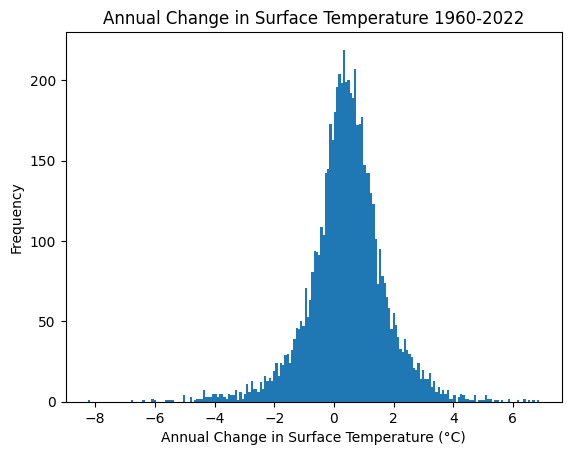

In [ ]:
#histogram
plt.hist(df_temp_final['Value'], bins=200)
plt.title('Annual Change in Surface Temperature 1960-2022')
plt.xlabel('Annual Change in Surface Temperature (°C)')
plt.ylabel('Frequency')
plt.show()

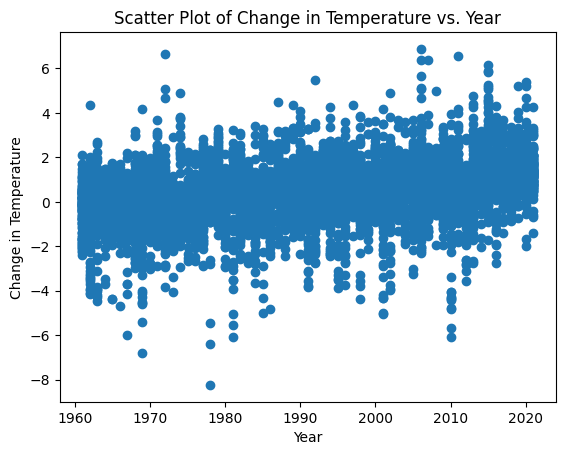

In [ ]:
#scatter plot of change in surface temperature and years

plt.scatter(df_temp_final['Year'], df_temp_final['Value'])

# Customize the plot (optional)
plt.title('Scatter Plot of Change in Temperature vs. Year')
plt.xlabel('Year')
plt.ylabel('Change in Temperature')


# Display the plot
plt.show()

In [ ]:
#calcualte mean by year
df_temp_final.groupby('Year')['Value'].mean()

Year
1961   -0.272038
1962   -0.399152
1963   -0.310257
1964   -0.406895
1965    0.123781
          ...   
2017    1.201142
2018    1.329349
2019    1.634755
2020    1.468877
2021    1.382396
Name: Value, Length: 61, dtype: float64

In [ ]:
#get descriptive table by year
df_temp_final.groupby('Year').describe()

Value                                                            
      count      mean       std    min      25%     50%      75%    max
Year                                                                   
1961  105.0 -0.272038  1.001685 -2.414 -0.93000 -0.1220  0.40200  2.110
1962  105.0 -0.399152  1.527495 -4.137 -0.85100 -0.1430  0.46100  4.364
1963  105.0 -0.310257  1.396686 -4.472 -0.64600 -0.0170  0.35100  2.675
1964  105.0 -0.406895  0.847864 -3.688 -0.83500 -0.4020  0.09800  1.464
1965  105.0  0.123781  1.039417 -4.364 -0.38100  0.2360  0.85000  1.738
...     ...       ...       ...    ...      ...     ...      ...    ...
2017  106.0  1.201142  0.937542 -1.394  0.57050  1.1565  1.72750  3.675
2018  106.0  1.329349  0.849117 -0.854  0.69800  1.2780  1.95525  3.363
2019  106.0  1.634755  0.968359 -0.723  0.99675  1.4710  2.15625  5.226
2020  106.0  1.468877  1.163487 -1.971  0.85425  1.2455  2.07700  5.371
2021  106.0  1.382396  0.827087 -1.389  0.92625  1.3235  1.74950  4.272

[61 rows x 8 columns]

In [ ]:
#calculate standard deviation by year
df_temp_std = df_temp_final.groupby('Year').std()
df_temp_std

<ipython-input-1031-60310c3148fe>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,Value
Year,
1961,1.001685
1962,1.527495
1963,1.396686
1964,0.847864
1965,1.039417
...,...
2017,0.937542
2018,0.849117
2019,0.968359


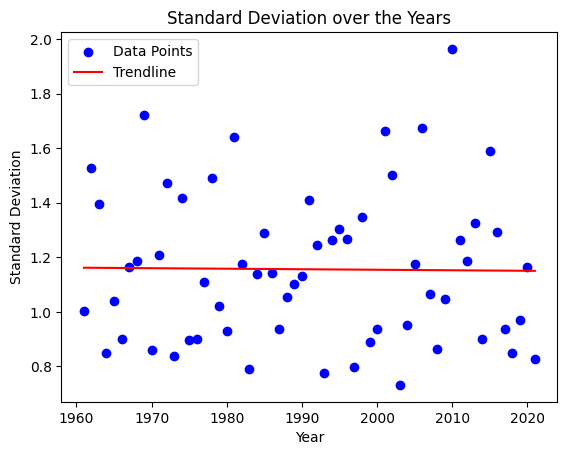

In [ ]:
#visualize evolution of standard deviation over year
plt.scatter(df_temp_std.index, df_temp_std['Value'], label='Data Points', color='blue')

# Add labels and a title
plt.xlabel('Year')
plt.ylabel('Standard Deviation')
plt.title('Standard Deviation over the Years')


coefficients = np.polyfit(df_temp_std.index, df_temp_std['Value'], 1)
trendline = np.poly1d(coefficients)

# Plot the trendline
plt.plot(df_temp_std.index, trendline(df_temp_std.index), color='red', label='Trendline')

# Add a legend (if applicable)
plt.legend()

# Show the plot
plt.show()

In [ ]:
#calculate skewness by year
skewness_by_year = df_temp_final.groupby('Year')['Value'].apply(skew)
print(skewness_by_year)

Year
1961   -0.236192
1962   -0.628513
1963   -1.159346
1964   -0.818524
1965   -1.559288
          ...   
2017    0.093725
2018    0.041404
2019    0.647254
2020    0.603141
2021    0.186710
Name: Value, Length: 61, dtype: float64


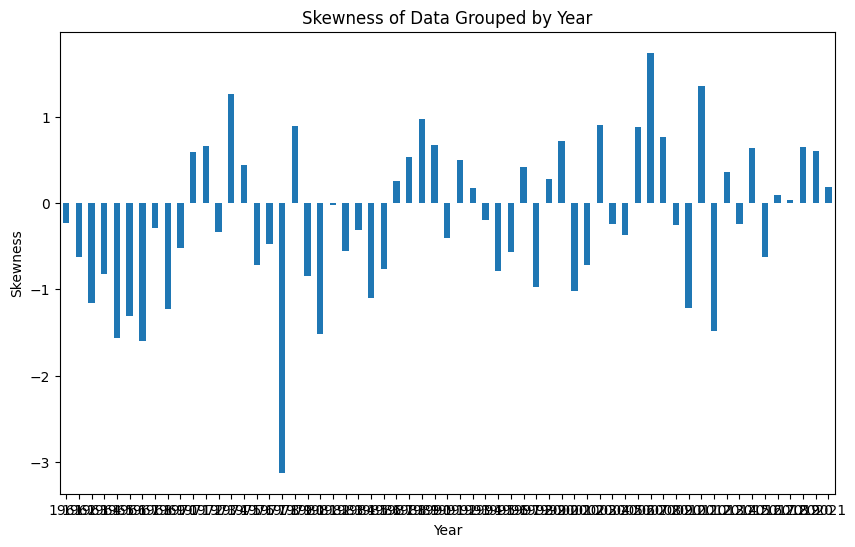

In [ ]:
#vislualize skewness by year
plt.figure(figsize=(10, 6))
skewness_by_year.plot(kind='bar', rot=0)
plt.title('Skewness of Data Grouped by Year')
plt.xlabel('Year')
plt.ylabel('Skewness')
plt.show()

# Univariate Analysis

In [ ]:
#create clusters
df_africa = df_temp_final.loc[df_temp_final['Area'].isin(["Algeria",'Angola','Cameroon','Central African Republic','Chad','Democratic Republic of the Congo','Egypt','Eswatini','Ethiopia PDR', 'Kenya','Lesotho','Libya','Madagascar',"Malawi","Mauritania",  'Mauritius',  'Morocco',  'Mozambique',  'Nigeria',  'Senegal', 'South Africa',  'Tunisia', 'Uganda',  'United Republic of Tanzania',  'Zambia','Zimbabwe'])]
df_na = df_temp_final.loc[df_temp_final['Area'].isin(['Canada','Cuba','Dominica','Dominican Republic','El Salvador','Guatemala','Haiti','Honduras', "Mexico",  'Nicaragua',  'United States of America'])]
df_sa = df_temp_final.loc[df_temp_final['Area'].isin(['Argentina','Bolivia (Plurinational State of)','Brazil','Chile','Colombia','Ecuador', "Paraguay",  'Peru', 'Uruguay', 'Venezuela (Bolivarian Republic of)'])]
df_asia = df_temp_final.loc[df_temp_final['Area'].isin(["Afghanistan",'Bangladesh','Bhutan','Cyprus',"Democratic People's Republic of Korea", 'China','India','Indonesia','Iran (Islamic Republic of)','Iraq','Israel', 'Japan','Jordan',"Lao People's Democratic Republic", 'Lebanon',  'Mongolia',  'Myanmar',  'Nepal',  'Pakistan',  'Philippines',  'Republic of Korea', 'Saudi Arabia',  'Sri Lanka',  'Syrian Arab Republic',  'Thailand',  'Türkiye',  'Viet Nam'])]
df_europe = df_temp_final.loc[df_temp_final['Area'].isin(['USSR','Albania','Austria','Belgium-Luxembourg','Bulgaria','Czechoslovakia','Denmark','Faroe Islands','Finland','France','Germany','Greece','Hungary','Iceland','Ireland','Italy', "Malta",  'Netherlands (Kingdom of the)',  'Norway',  'Poland', 'Portugal',  'Romania',  'Spain', 'Sweden',  'Switzerland',  'United Kingdom of Great Britain and Northern Ireland',  'Yugoslav SFR'])]
df_oceania = df_temp_final.loc[df_temp_final['Area'].isin(['Australia','Fiji','French Polynesia', "New Caledonia", 'New Zealand', 'Papua New Guinea'])]

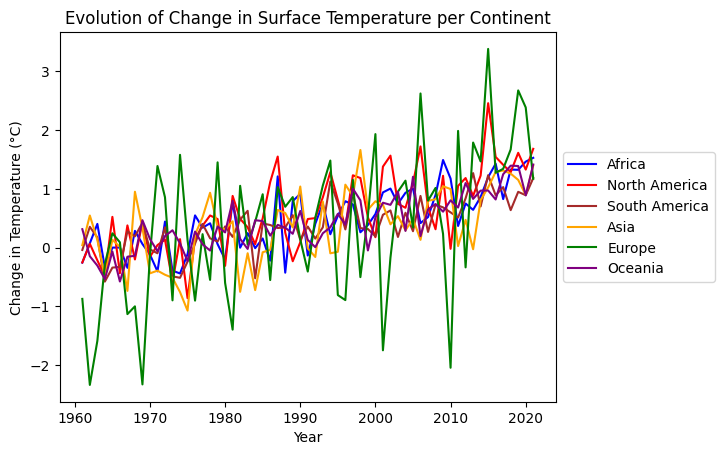

In [ ]:
#plot evoluation of change in surface temperature by continent
df_africa_grouped = df_africa.groupby('Year')['Value'].mean()
df_asia_grouped = df_asia.groupby('Year')['Value'].mean()
df_europe_grouped = df_europe.groupby('Year')['Value'].mean()
df_na_grouped = df_na.groupby('Year')['Value'].mean()
df_oceania_grouped = df_oceania.groupby('Year')['Value'].mean()
df_sa_grouped = df_sa.groupby('Year')['Value'].mean()


plt.plot(df_africa_grouped.index, df_africa_grouped, label='Africa', color='b')
plt.plot(df_na_grouped.index, df_na_grouped, label='North America', color ='r')
plt.plot(df_sa_grouped.index, df_sa_grouped, label='South America', color = 'brown')
plt.plot(df_asia_grouped.index, df_asia_grouped, label='Asia', color = 'orange')
plt.plot(df_europe_grouped.index, df_europe_grouped, label='Europe', color = 'g')
plt.plot(df_oceania_grouped.index, df_oceania_grouped, label='Oceania', color = 'purple')

plt.title('Evolution of Change in Surface Temperature per Continent')
plt.xlabel('Year')
plt.ylabel('Change in Temperature (°C)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Display the plot
plt.show()

In [ ]:
#create map
df_temp_map1 = df_temp[df_temp['Year'] > 2016]
df_temp_map1 = df_temp_map1[df_temp_map1['Year'] < 2022]
df_map = df_temp_map1.groupby('Area')['Value'].mean().reset_index()
fig = px.choropleth(df_map,
                    locations='Area',
                    locationmode='country names',
                    color='Value',
                    hover_name='Area',
                    color_continuous_scale='reds')
fig.update_layout(title={'text': 'Map of Change in Surface Temperature',
                                   'y':0.9,
                                   'x':0.5,
                                   'xanchor': 'center',
                                   'yanchor': 'top'})
fig.show()

In [ ]:
#get descriptive table of map
df_map.describe()

,Value
count,228.000000
mean,1.386041
std,0.609614
min,-0.037600
25%,1.011500
50%,1.293800
75%,1.726950
max,4.731000
